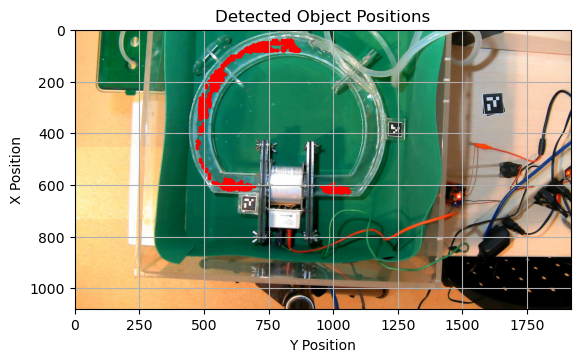

In [1]:
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
from datetime import datetime

# Load the image 
image = cv2.imread('blend_test.png')
# Load JSON data
path = 'Generated_data/Fish_data.json'
with open(path, 'r') as f:
    data = json.load(f)
# Filter data where 'detected' is true and 'centroid' exists
detected_data = [item['centroids'][0] for item in data if item.get('detected') and 'centroids' in item]
# Extract x and y positions
x_positions = [centroid[0] for centroid in detected_data]
y_positions = [centroid[1] for centroid in detected_data]

# Plot the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# Plot x and y data on top of the image
plt.scatter(x_positions, y_positions, color='red', marker='.', s=10)  # s=10 adjusts the size of the markers
plt.xlabel('Y Position')
plt.ylabel('X Position')
plt.title('Detected Object Positions')
plt.grid(True)
plt.show()

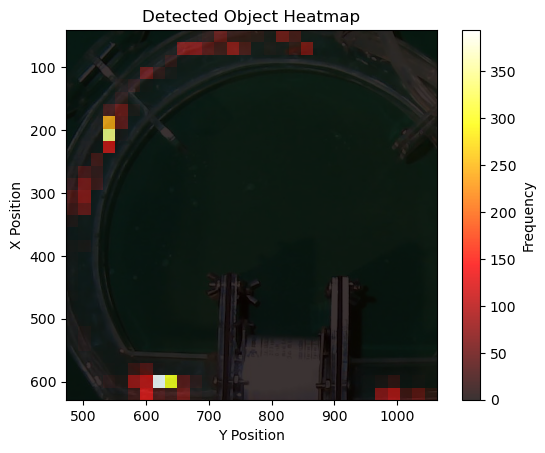

In [2]:
# Create a heatmap
heatmap, xedges, yedges = np.histogram2d(x_positions, y_positions, bins=30)

# Plot the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Plot the heatmap overlay
plt.imshow(heatmap.T, extent=[xedges[0], xedges[-1], yedges[-1], yedges[0]], alpha=0.8, cmap='hot')
plt.colorbar(label='Frequency')
plt.xlabel('Y Position')
plt.ylabel('X Position')
plt.title('Detected Object Heatmap')
plt.show()


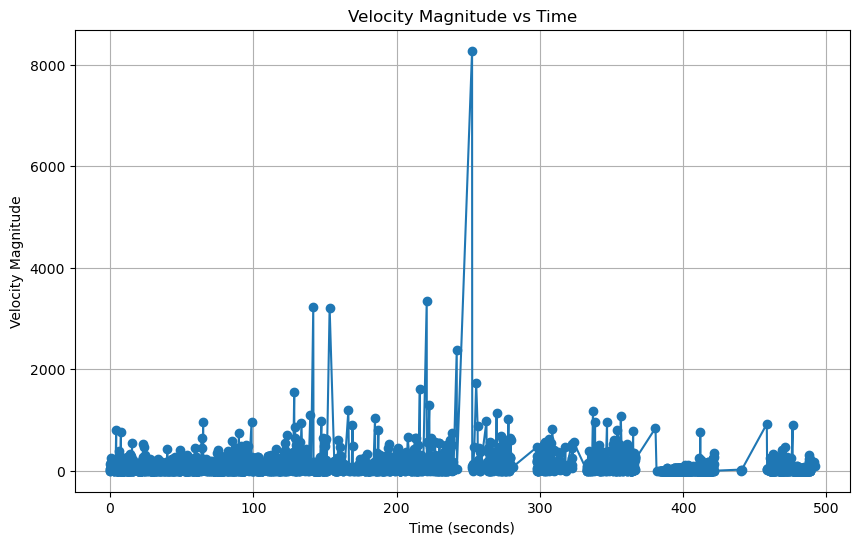

In [10]:
# Extract timestamps and velocities when detected
timestamps = []
distances = []
velocities = []
for item in data:
    if item.get('detected') and 'velocity' in item:
        velocity = item['velocity']
        if len(velocity) == 2:  # Ensure there are two components in the velocity
            timestamps.append(item['timestamp'])
            velocities.append(velocity)

# Convert timestamps to datetime objects
time_format = '%Y-%m-%d %H:%M:%S:%f'
timestamps_dt = [datetime.strptime(timestamp, time_format) for timestamp in timestamps]

# Convert datetime objects to seconds relative to the first timestamp
start_time = timestamps_dt[0]
timestamps_in_seconds = [(timestamp - start_time).total_seconds() for timestamp in timestamps_dt]

# Calculate the magnitude of the velocity vector
vel_magnitudes = [np.sqrt(velocity[0]**2 + velocity[1]**2) for velocity in velocities]

# Plot velocity vs time
plt.figure(figsize=(10, 6))
plt.plot(timestamps_in_seconds, vel_magnitudes, marker='o')
plt.xlabel('Time (seconds)')
plt.ylabel('Velocity Magnitude')
plt.title('Velocity Magnitude vs Time')
plt.grid(True)
plt.show()

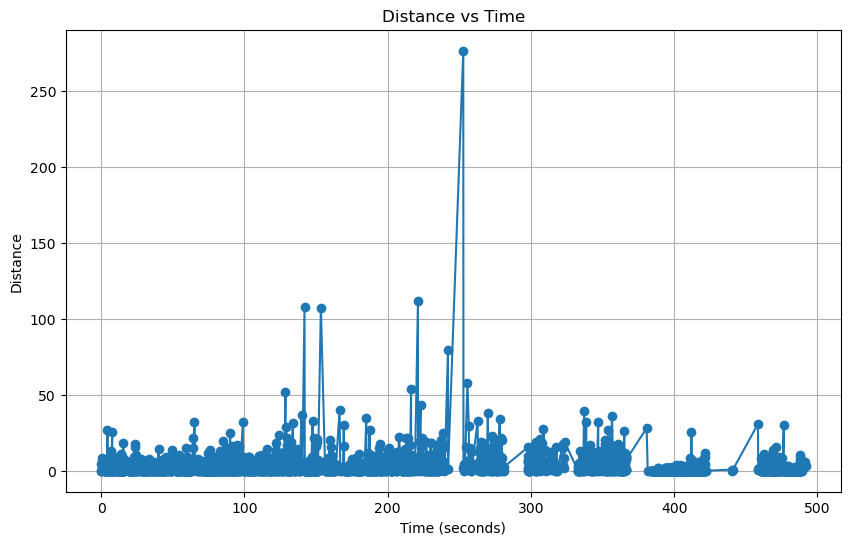

In [4]:
# Extract timestamps and distances when detected
timestamps = []
distances = []

for item in data:
    if item.get('detected') and 'distance' in item:
        timestamps.append(item['timestamp'])
        distances.append(item['distance'])
# Convert timestamps to datetime objects
time_format = '%Y-%m-%d %H:%M:%S:%f'
timestamps_dt = [datetime.strptime(timestamp, time_format) for timestamp in timestamps]

# Convert datetime objects to seconds relative to the first timestamp
start_time = timestamps_dt[0]
timestamps_in_seconds = [(timestamp - start_time).total_seconds() for timestamp in timestamps_dt]

# Plot distance vs time
plt.figure(figsize=(10, 6))
plt.plot(timestamps_in_seconds, distances, marker='o')
plt.xlabel('Time (seconds)')
plt.ylabel('Distance')
plt.title('Distance vs Time')
plt.grid(True)
plt.show()